In [2]:
# linear algebra
import numpy as np
# data processing
import pandas as pd
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [390]:
#Accessing the file locations
train_path='C:/1_VISHAL/used cars/Participants_Data_Used_Cars/Participants_Data_Used_Cars/Data_train.xlsx'
test_path='C:/1_VISHAL/used cars/Participants_Data_Used_Cars/Participants_Data_Used_Cars/Data_test.xlsx'
submission_path='C:/1_VISHAL/used cars/Participants_Data_Used_Cars/Participants_Data_Used_Cars/Sample_submission.xlsx'

In [391]:
#creating dataframe
train_df=pd.read_excel(train_path)
test_df=pd.read_excel(test_path)
submission_df=pd.read_excel(submission_path)

In [392]:
test_combined=pd.concat([test_df,submission_df],axis=1)

In [393]:
#As New_Price Column contains lot of missing values hence dropping it from train and test df.
train_df.drop(['New_Price'],axis=1,inplace=True)
test_combined.drop(['New_Price'],axis=1,inplace=True)

In [394]:
# checling missing values in all columns

total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 =train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1,1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

C:\Users\visha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,Total,%
Engine,36,0.6
Fuel_Type,0,0.0
Kilometers_Driven,0,0.0
Location,0,0.0
Mileage,2,0.0
Name,0,0.0
Owner_Type,0,0.0
Power,36,0.6
Price,0,0.0
Seats,42,0.7


In [395]:
# as most of the cars in data set are 5 seater..replacing NAN values with value 5
train_df['Seats'].fillna('5', inplace=True)
test_combined['Seats'].fillna('5', inplace=True)

In [396]:
#missing data for Engine and Power columns can be found from similar car types.As cars from same segment often have same engine
#and power output

train_df['Engine'][train_df['Name'].str.contains('Honda City 1.5 GXI')]="1493 CC"
train_df['Power'][train_df['Name'].str.contains('Honda City 1.5 GXI')]="100 bhp"
train_df['Engine'][train_df['Name'].str.contains('Maruti Swift 1.3 VXi')]="1248 CC"
train_df['Power'][train_df['Name'].str.contains('Maruti Swift 1.3 VXi')]="74 bhp"
train_df['Engine'][train_df['Name'].str.contains('Land Rover Range Rover 3.0 D')]="2993 CC"
train_df['Power'][train_df['Name'].str.contains('Land Rover Range Rover 3.0 D')]="255 bhp"
train_df['Engine'][train_df['Name'].str.contains('Honda City 1.3 DX')]="1298 CC"
train_df['Power'][train_df['Name'].str.contains('Honda City 1.3 DX')]="90 bhp"
train_df['Engine'][train_df['Name'].str.contains('Maruti Swift 1.3')]="1248 CC"
train_df['Power'][train_df['Name'].str.contains('Maruti Swift 1.3')]="74 bhp"
train_df['Engine'][train_df['Name'].str.contains('BMW 5 Series 520d Sedan')]="2993 CC"
train_df['Power'][train_df['Name'].str.contains('BMW 5 Series 520d Sedan')]="265 bhp"
train_df['Engine'][train_df['Name'].str.contains('Fiat Punto')]="1172 CC"
train_df['Power'][train_df['Name'].str.contains('Fiat Punt')]="67 bhp"
train_df['Engine'][train_df['Name'].str.contains('Hyundai Santro GLS II - Euro II')]="1086 CC"
train_df['Power'][train_df['Name'].str.contains('Hyundai Santro GLS II - Euro II')]="62.1 bhp"
train_df['Engine'][train_df['Name'].str.contains('Hyundai Santro LP zipPlus')]="1086 CC"
train_df['Power'][train_df['Name'].str.contains('Hyundai Santro LP zipPlus')]="62.1 bhp"
train_df['Engine'][train_df['Name'].str.contains('Hyundai Santro Xing XG')]="1086 CC"
train_df['Power'][train_df['Name'].str.contains('Hyundai Santro Xing XG')]="62.1 bhp"
train_df['Engine'][train_df['Name'].str.contains('Honda CR-V AT With Sun Roof')]="1997 CC"
train_df['Power'][train_df['Name'].str.contains('Honda CR-V AT With Sun Roof')]="154 bhp"
train_df['Engine'][train_df['Name'].str.contains('Honda Jazz Select Edition')]="1199 CC"
train_df['Power'][train_df['Name'].str.contains('Honda Jazz Select Edition')]="89 bhp"
train_df['Engine'][train_df['Name'].str.contains('Land Rover Range Rover Sport 2005 2012 Sport')]="2995 CC"
train_df['Power'][train_df['Name'].str.contains('Land Rover Range Rover Sport 2005 2012 Sport')]="335 bhp"
train_df['Engine'][train_df['Name'].str.contains('Maruti Wagon R Vx')]="998 CC"
train_df['Power'][train_df['Name'].str.contains('Maruti Wagon R Vx')]="67 bhp"
train_df['Engine'][train_df['Name'].str.contains('Toyota Etios Liva V')]="1197 CC"
train_df['Power'][train_df['Name'].str.contains('Toyota Etios Liva V')]="78.9 bhp"
train_df['Mileage'][train_df['Name'].str.contains('Mahindra E Verito D4')]="110 Kmpl"
train_df['Mileage'][train_df['Name'].str.contains('Toyota Prius 2009-2016 Z4')]="23.9 Kmpl"


test_combined['Engine'][test_combined['Name'].str.contains('Honda City 1.5 GXI')]="1493 CC"
test_combined['Power'][test_combined['Name'].str.contains('Honda City 1.5 GXI')]="100 bhp"
test_combined['Engine'][test_combined['Name'].str.contains('Maruti Swift 1.3 VXi')]="1248 CC"
test_combined['Power'][test_combined['Name'].str.contains('Maruti Swift 1.3 VXi')]="74 bhp"
test_combined['Engine'][test_combined['Name'].str.contains('Land Rover Range Rover 3.0 D')]="2993 CC"
test_combined['Power'][test_combined['Name'].str.contains('Land Rover Range Rover 3.0 D')]="255 bhp"
test_combined['Engine'][test_combined['Name'].str.contains('Honda City 1.3 DX')]="1298 CC"
test_combined['Power'][test_combined['Name'].str.contains('Honda City 1.3 DX')]="90 bhp"
test_combined['Engine'][test_combined['Name'].str.contains('Maruti Swift 1.3')]="1248 CC"
test_combined['Power'][test_combined['Name'].str.contains('Maruti Swift 1.3')]="74 bhp"
test_combined['Engine'][test_combined['Name'].str.contains('BMW 5 Series 520d Sedan')]="2993 CC"
test_combined['Power'][test_combined['Name'].str.contains('BMW 5 Series 520d Sedan')]="265 bhp"
test_combined['Engine'][test_combined['Name'].str.contains('Fiat Punto')]="1172 CC"
test_combined['Power'][test_combined['Name'].str.contains('Fiat Punt')]="67 bhp"
test_combined['Engine'][test_combined['Name'].str.contains('Hyundai Santro GLS II - Euro II')]="1086 CC"
test_combined['Power'][test_combined['Name'].str.contains('Hyundai Santro GLS II - Euro II')]="62.1 bhp"
test_combined['Engine'][test_combined['Name'].str.contains('Hyundai Santro LP zipPlus')]="1086 CC"
test_combined['Power'][test_combined['Name'].str.contains('Hyundai Santro LP zipPlus')]="62.1 bhp"
test_combined['Engine'][test_combined['Name'].str.contains('Hyundai Santro Xing XG')]="1086 CC"
test_combined['Power'][test_combined['Name'].str.contains('Hyundai Santro Xing XG')]="62.1 bhp"
test_combined['Engine'][test_combined['Name'].str.contains('Honda CR-V AT With Sun Roof')]="1997 CC"
test_combined['Power'][test_combined['Name'].str.contains('Honda CR-V AT With Sun Roof')]="154 bhp"
test_combined['Engine'][test_combined['Name'].str.contains('Honda Jazz Select Edition')]="1199 CC"
test_combined['Power'][test_combined['Name'].str.contains('Honda Jazz Select Edition')]="89 bhp"
test_combined['Engine'][test_combined['Name'].str.contains('Land Rover Range Rover Sport 2005 2012 Sport')]="2995 CC"
test_combined['Power'][test_combined['Name'].str.contains('Land Rover Range Rover Sport 2005 2012 Sport')]="335 bhp"
test_combined['Engine'][test_combined['Name'].str.contains('Maruti Wagon R Vx')]="998 CC"
test_combined['Power'][test_combined['Name'].str.contains('Maruti Wagon R Vx')]="67 bhp"
test_combined['Engine'][test_combined['Name'].str.contains('Toyota Etios Liva V')]="1197 CC"
test_combined['Power'][test_combined['Name'].str.contains('Toyota Etios Liva V')]="78.9 bhp"
test_combined['Mileage'][test_combined['Name'].str.contains('Mahindra E Verito D4')]="110 Kmpl"
test_combined['Mileage'][test_combined['Name'].str.contains('Toyota Prius 2009-2016 Z4')]="23.9 Kmpl"

C:\Users\visha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\visha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\visha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\visha\Anac

C:\Users\visha\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\visha\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\visha\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\visha\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

C:\Users\visha\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\visha\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [482]:
#there are still some columns in test df with NaN value...getting those rows using below command

print(test_combined[test_combined.isnull().any(axis=1)])

Empty DataFrame
Columns: [Kilometers_Driven, Mileage, Engine, Power, Seats, Price, Location_Ahmedabad, Location_Bangalore, Location_Chennai, Location_Coimbatore, Location_Delhi, Location_Hyderabad, Location_Jaipur, Location_Kochi, Location_Kolkata, Location_Mumbai, Location_Pune, Fuel_Type_Diesel, Fuel_Type_Other, Fuel_Type_Petrol, Transmission_Automatic, Transmission_Manual, Owner_Type_First, Owner_Type_Second, Owner_Type_Third, Condition_Mid, Condition_New, Condition_Old, Category_High, Category_Mid, Category_Low]
Index: []

[0 rows x 31 columns]


In [399]:
#filling up NaN values in Engind and Power columns with similar segment cars values

test_combined['Engine'][test_combined['Name'].str.contains('Skoda Laura 1.8 TSI Ambition')]="1798 CC"
test_combined['Power'][test_combined['Name'].str.contains('Skoda Laura 1.8 TSI Ambition')]="157.8 bhp"

test_combined['Engine'][test_combined['Name'].str.contains('Toyota Etios Liva Diesel TRD Sportivo')]="1364 CC"
test_combined['Power'][test_combined['Name'].str.contains('Toyota Etios Liva Diesel TRD Sportivo')]="67.1 bhp"

test_combined['Engine'][test_combined['Name'].str.contains('Hyundai i20 new Sportz AT 1.4')]="1197 CC"
test_combined['Power'][test_combined['Name'].str.contains('Hyundai i20 new Sportz AT 1.4')]="80 bhp"

test_combined['Engine'][test_combined['Name'].str.contains('Mahindra TUV 300 P4')]="1493 CC"
test_combined['Power'][test_combined['Name'].str.contains('Mahindra TUV 300 P4')]="100 bhp"

C:\Users\visha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\visha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\visha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\visha\Anaconda3\lib\site-packages\ipykernel_launcher

In [400]:
#again check for null values
test_combined.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [401]:
#Power column has "null bhp" as a string value..replacing that with 113--mean of Power column

train_df['Power']=train_df['Power'].replace(['null bhp'],[113])
test_combined['Power']=test_combined['Power'].replace(['null bhp'],[113])

In [402]:
#As we need numeric values from Mileage,Engine and Power column..removing the unnecessary characters

train_df['Mileage']=train_df['Mileage'].str.split(' ').str[0]
train_df['Engine']=train_df['Engine'].str.split(' ').str[0]
train_df['Power']=train_df['Power'].str.split(' ').str[0]

test_combined['Engine']=test_combined['Engine'].str.split(' ').str[0]
test_combined['Power']=test_combined['Power'].str.split(' ').str[0]
test_combined['Mileage']=test_combined['Mileage'].str.split(' ').str[0]

In [403]:
#converting from object to float/int dtype

train_df['Mileage'] = train_df['Mileage'].astype('float64')
train_df['Engine'] = train_df['Engine'].astype('float64')
train_df['Power'] = train_df['Power'].astype('float64')
train_df['Seats'] = train_df['Seats'].astype('int64')

test_combined['Mileage'] = test_combined['Mileage'].astype('float64')
test_combined['Engine'] = test_combined['Engine'].astype('float64')
test_combined['Power'] = test_combined['Power'].astype('float64')
test_combined['Seats'] = test_combined['Seats'].astype('int64')

In [404]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6019 non-null float64
Engine               6019 non-null float64
Power                5914 non-null float64
Seats                6019 non-null int64
Price                6019 non-null float64
dtypes: float64(4), int64(3), object(5)
memory usage: 564.4+ KB


In [405]:
#As seat count cannot be 0...replacing with the mean value that is 5

train_df['Seats']=train_df['Seats'].replace([0],[5])
test_combined['Seats']=test_combined['Seats'].replace([0],[5])

In [291]:
# checking correlation at initial stage
corr = test_combined.corr()
display(corr)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.455227,0.327026,-0.071756,0.002985,-0.010642,0.119151
Kilometers_Driven,-0.455227,1.000000,-0.147148,0.186202,0.006378,0.217155,-0.058846
Mileage,0.327026,-0.147148,1.000000,-0.563063,-0.490743,-0.315144,-0.114833
Engine,-0.071756,0.186202,-0.563063,1.000000,0.827182,0.428254,0.253054
Power,0.002985,0.006378,-0.490743,0.827182,1.000000,0.067683,0.318338
Seats,-0.010642,0.217155,-0.315144,0.428254,0.067683,1.000000,-0.005463
Price,0.119151,-0.058846,-0.114833,0.253054,0.318338,-0.005463,1.000000


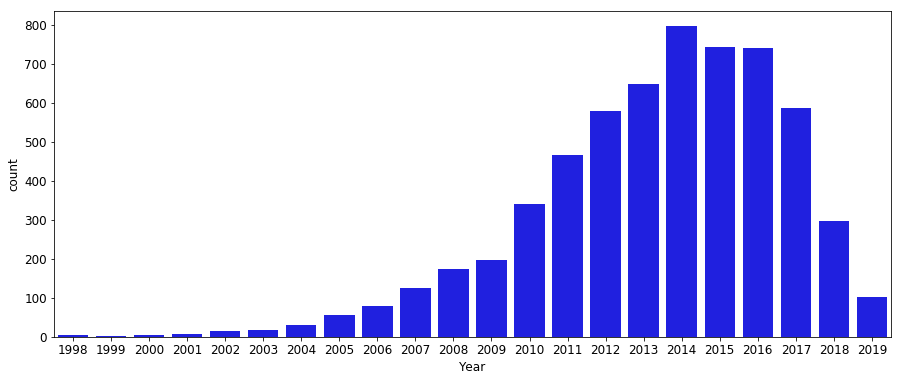

In [226]:
#checking in which year car sale was highest
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['font.size'] = 12
sns.countplot(train_df['Year'], color = 'blue')

In [406]:
#As electric,lpg and cng varients form really small chunk of data set..combining them together into new value 'Other'

fuel=['Electric','LPG','CNG']
for i in fuel:
    train_df['Fuel_Type']=train_df['Fuel_Type'].replace([i],['Other'])
    test_combined['Fuel_Type']=test_combined['Fuel_Type'].replace([i],['Other'])
    

In [407]:
#Fourth & above value for a small chunk..hence combining it into Third attribute in Owner_type column

train_df['Owner_Type']=train_df['Owner_Type'].replace(['Fourth & Above'],['Third'])
test_combined['Owner_Type']=test_combined['Owner_Type'].replace(['Fourth & Above'],['Third'])

In [408]:
#creating new feature called as category based on price in train df

def groups(Price):
    if Price <= 8:
        return 'Low'
    if Price > 8 and Price < 25:
        return 'Mid'
    else:
        return 'High'
train_df['Category'] = train_df.apply(lambda x: groups(x['Price']), axis = 1)

# checking the values
train_df['Category'].value_counts()

Low     4115
Mid     1390
High     514
Name: Category, dtype: int64

In [409]:
#creating new feature called as category based on price in test df

def groups(Price):
    if Price <= 8:
        return 'Low'
    if Price > 8 and Price < 25:
        return 'Mid'
    else:
        return 'High'
test_combined['Category'] = test_combined.apply(lambda x: groups(x['Price']), axis = 1)

# checking the values
test_combined['Category'].value_counts()

High    1137
Mid       97
Name: Category, dtype: int64

In [410]:
#dropping Name column as its not necessary

train_df.drop(['Name'],axis=1,inplace=True)
test_combined.drop(['Name'],axis=1,inplace=True)

In [411]:
#creting new feature called condition based on year of car in train df

def groups(Year):
    if Year <= 2004:
        return 'Old'
    if Year > 2005 and Year < 2015:
        return 'Mid'
    else:
        return 'New'
test_combined['Condition'] = test_combined.apply(lambda x: groups(x['Year']), axis = 1)

# checking the values
test_combined['Condition'].value_counts()

Mid    679
New    543
Old     12
Name: Condition, dtype: int64

In [412]:
#creting new feature called condition based on year of car in test df

def groups(Year):
    if Year <= 2004:
        return 'Old'
    if Year > 2005 and Year < 2015:
        return 'Mid'
    else:
        return 'New'
train_df['Condition'] = train_df.apply(lambda x: groups(x['Year']), axis = 1)

# checking the values
train_df['Condition'].value_counts()

Mid    3409
New    2529
Old      81
Name: Condition, dtype: int64

In [414]:
test_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
Location             1234 non-null object
Kilometers_Driven    1234 non-null int64
Fuel_Type            1234 non-null object
Transmission         1234 non-null object
Owner_Type           1234 non-null object
Mileage              1234 non-null float64
Engine               1234 non-null float64
Power                1213 non-null float64
Seats                1234 non-null int64
Price                1234 non-null float64
Category             1234 non-null object
Condition            1234 non-null object
dtypes: float64(4), int64(2), object(6)
memory usage: 115.8+ KB


In [413]:
#removing Year column as we have created new feature called condition based on year column

train_df.drop(['Year'],axis=1,inplace=True)
test_combined.drop(['Year'],axis=1,inplace=True)

In [415]:
#creting dummines function for train df

todummy_list=['Location','Fuel_Type','Transmission','Owner_Type','Condition','Category']
def dummy_df(train_df,todummy_list):
    for x in todummy_list:
        dummies=pd.get_dummies(train_df[x],prefix=x,dummy_na=False)
        train_df=train_df.drop(x,1)
        train_df=pd.concat([train_df,dummies],axis=1)
    return train_df

In [416]:
#calling dumming function for train df

train_df=dummy_df(train_df,todummy_list)
print(train_df.head(5))

   Kilometers_Driven  Mileage  Engine   Power  Seats  Price  \
0              72000    26.60   998.0   58.16      5   1.75   
1              41000    19.67  1582.0  126.20      5  12.50   
2              46000    18.20  1199.0   88.70      5   4.50   
3              87000    20.77  1248.0   88.76      7   6.00   
4              40670    15.20  1968.0  140.80      5  17.74   

   Location_Ahmedabad  Location_Bangalore  Location_Chennai  \
0                   0                   0                 0   
1                   0                   0                 0   
2                   0                   0                 1   
3                   0                   0                 1   
4                   0                   0                 0   

   Location_Coimbatore      ...       Transmission_Manual  Owner_Type_First  \
0                    0      ...                         1                 1   
1                    0      ...                         1                 1   
2    

In [417]:
test_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
Location             1234 non-null object
Kilometers_Driven    1234 non-null int64
Fuel_Type            1234 non-null object
Transmission         1234 non-null object
Owner_Type           1234 non-null object
Mileage              1234 non-null float64
Engine               1234 non-null float64
Power                1213 non-null float64
Seats                1234 non-null int64
Price                1234 non-null float64
Category             1234 non-null object
Condition            1234 non-null object
dtypes: float64(4), int64(2), object(6)
memory usage: 115.8+ KB


In [418]:
#creting dummines function for test df

todummy_list=['Location','Fuel_Type','Transmission','Owner_Type','Condition','Category']
def dummy_df(test_combined,todummy_list):
    for x in todummy_list:
        dummies=pd.get_dummies(test_combined[x],prefix=x,dummy_na=False)
        test_combined=test_combined.drop(x,1)
        test_combined=pd.concat([test_combined,dummies],axis=1)
    return test_combined

In [419]:
#calling dumming function for test df

test_combined=dummy_df(test_combined,todummy_list)
print(test_combined.head(5))

   Kilometers_Driven  Mileage  Engine   Power  Seats  Price  \
0              40929    32.26   998.0   58.20      4  55.02   
1              54493    24.70   796.0   47.30      5  56.46   
2              34000    13.68  2393.0  147.80      7  34.61   
3             139000    23.59  1364.0     NaN      5  16.89   
4              29000    18.50  1197.0   82.85      5  50.48   

   Location_Ahmedabad  Location_Bangalore  Location_Chennai  \
0                   0                   0                 0   
1                   0                   0                 0   
2                   0                   0                 0   
3                   0                   0                 0   
4                   0                   0                 0   

   Location_Coimbatore      ...       Transmission_Automatic  \
0                    0      ...                            0   
1                    1      ...                            0   
2                    0      ...                   

In [420]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 31 columns):
Kilometers_Driven         6019 non-null int64
Mileage                   6019 non-null float64
Engine                    6019 non-null float64
Power                     5914 non-null float64
Seats                     6019 non-null int64
Price                     6019 non-null float64
Location_Ahmedabad        6019 non-null uint8
Location_Bangalore        6019 non-null uint8
Location_Chennai          6019 non-null uint8
Location_Coimbatore       6019 non-null uint8
Location_Delhi            6019 non-null uint8
Location_Hyderabad        6019 non-null uint8
Location_Jaipur           6019 non-null uint8
Location_Kochi            6019 non-null uint8
Location_Kolkata          6019 non-null uint8
Location_Mumbai           6019 non-null uint8
Location_Pune             6019 non-null uint8
Fuel_Type_Diesel          6019 non-null uint8
Fuel_Type_Other           6019 non-null uint8
Fuel_Type_P

In [421]:
test_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 30 columns):
Kilometers_Driven         1234 non-null int64
Mileage                   1234 non-null float64
Engine                    1234 non-null float64
Power                     1213 non-null float64
Seats                     1234 non-null int64
Price                     1234 non-null float64
Location_Ahmedabad        1234 non-null uint8
Location_Bangalore        1234 non-null uint8
Location_Chennai          1234 non-null uint8
Location_Coimbatore       1234 non-null uint8
Location_Delhi            1234 non-null uint8
Location_Hyderabad        1234 non-null uint8
Location_Jaipur           1234 non-null uint8
Location_Kochi            1234 non-null uint8
Location_Kolkata          1234 non-null uint8
Location_Mumbai           1234 non-null uint8
Location_Pune             1234 non-null uint8
Fuel_Type_Diesel          1234 non-null uint8
Fuel_Type_Other           1234 non-null uint8
Fuel_Type_P

In [422]:
#As test df has Category_low column missing..adding it with default value 0
#test df has not car with category low hence adding default value

test_combined['Category_Low']=0

In [430]:
#filling NaN values in Power column with mean value i.e 113

train_df['Power'].fillna(113,inplace=True)
test_combined['Power'].fillna(113,inplace=True)

In [269]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#scaler.fit(train_df)
#train_df=scaler.transform(train_df)

#scaler.fit(test_combined)
#test_combined=scaler.transform(test_combined)

In [431]:
# creating x_train,y_train,x_test,y_test as train and test is already provided to us

X_train=train_df.drop("Price", axis=1)
y_train=train_df["Price"]

X_test=test_combined.drop("Price", axis=1)
y_test=test_combined["Price"]

In [425]:
X_test.shape

(1234, 30)

In [426]:
y_train.shape

(6019,)

In [427]:
y_test.shape

(1234,)

In [208]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#scaler.fit(X_train)
#X_train=scaler.transform(X_train)

In [433]:
# buliding Linear regression model

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
Y_pred = lr.predict(X_test)
acc_log = round(lr.score(X_train, y_train) * 100, 2)
acc_log

84.23

In [435]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
# calculate the mean squared error
model_mse = mean_squared_error(y_test, Y_pred)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, Y_pred)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 1.19e+03
MAE 29.0
RMSE 34.4


In [437]:
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
X2 = sm.add_constant(X_train)

In [438]:
model = sm.OLS(y_train, X2)

In [439]:
est = model.fit()

In [445]:
# Run the Breusch-Pagan test
_, pval, __, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity.")

else:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heterosecdasticity.")

4.216402559640947e-79 1.611775177633244e-86
----------------------------------------------------------------------------------------------------
For the Breusch-Pagan's Test
The p-value was 4.216e-79
We reject the null hypthoesis, so there is heterosecdasticity.


The number of lags will be 10
----------------------------------------------------------------------------------------------------
The lowest p-value found was 0.4078
We fail to reject the null hypthoesis, so there is no autocorrelation.
----------------------------------------------------------------------------------------------------


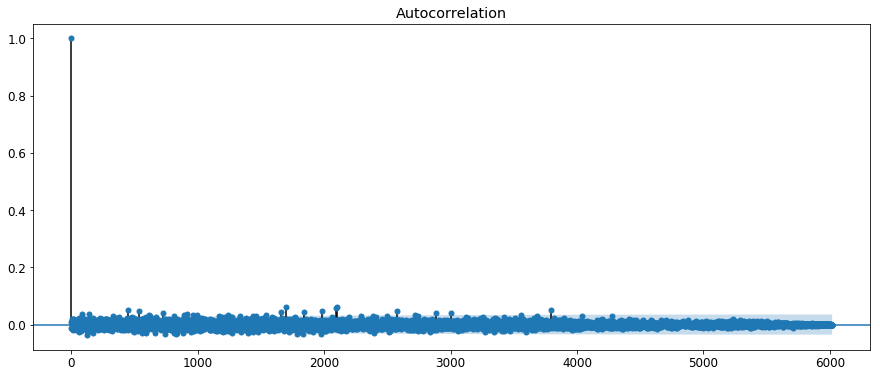

In [447]:
# test for autocorrelation
from statsmodels.stats.stattools import durbin_watson

# calculate the lag, optional
lag = min(10, (len(X_train)//5))
print('The number of lags will be {}'.format(lag))
print('-'*100)

# run the Ljung-Box test for no autocorrelation of residuals
# test_results = diag.acorr_breusch_godfrey(est, nlags = lag, store = True)
test_results = diag.acorr_ljungbox(est.resid, lags = lag)

# grab the p-values and the test statistics
ibvalue, p_val = test_results

# print the results of the test
if min(p_val) > 0.05:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We fail to reject the null hypthoesis, so there is no autocorrelation.")
    print('-'*100)
else:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We reject the null hypthoesis, so there is autocorrelation.")
    print('-'*100)

# plot autocorrelation
sm.graphics.tsa.plot_acf(est.resid)
plt.show()

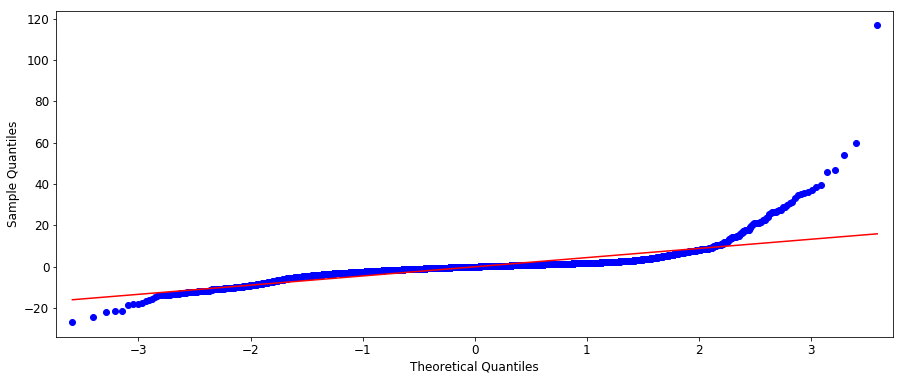

The mean of the residuals is 1.066e-14


In [448]:
import pylab

# check for the normality of the residuals
sm.qqplot(est.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(est.resid)/ len(est.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [450]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(y_test, Y_pred)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, Y_pred)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 1.19e+03
MAE 29.0
RMSE 34.4


In [451]:
model_r2 = r2_score(y_test,Y_pred)
print("R2: {:.2}".format(model_r2))

R2: -1.4


In [452]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     1334.
Date:                Sun, 23 Jun 2019   Prob (F-statistic):               0.00
Time:                        20:04:36   Log-Likelihood:                -17515.
No. Observations:                6019   AIC:                         3.508e+04
Df Residuals:                    5994   BIC:                         3.525e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

In [453]:
#removing columns with have p_value>0.05 as they are insignificant

train_df_after = train_df.drop(['Location_Ahmedabad','Location_Bangalore','Location_Chennai','Location_Coimbatore',
                               'Location_Delhi','Location_Hyderabad','Location_Jaipur','Location_Kochi',
                               'Location_Kolkata','Location_Mumbai','Location_Pune','Kilometers_Driven','Fuel_Type_Petrol',
                               'Owner_Type_Third','Condition_Mid','Condition_Old'], axis = 1)

In [454]:
X = train_df_after.drop('Price', axis = 1)
Y = train_df_after[['Price']]

In [456]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [457]:
regression_model = LinearRegression()


In [458]:
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [459]:
X2 = sm.add_constant(X)

In [460]:
model = sm.OLS(Y, X2)


In [461]:
est = model.fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     2629.
Date:                Sun, 23 Jun 2019   Prob (F-statistic):               0.00
Time:                        20:22:29   Log-Likelihood:                -17558.
No. Observations:                6019   AIC:                         3.514e+04
Df Residuals:                    6006   BIC:                         3.523e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

In [463]:
train_df_after1 = train_df_after.drop(['Fuel_Type_Other','Owner_Type_Second'], axis = 1)

In [464]:
X1 = train_df_after1.drop('Price', axis = 1)
Y1 = train_df_after1[['Price']]

In [465]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.20, random_state=1)

In [466]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
X_1 = sm.add_constant(X1)
model = sm.OLS(Y1, X_1)
est = model.fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     3154.
Date:                Sun, 23 Jun 2019   Prob (F-statistic):               0.00
Time:                        20:28:50   Log-Likelihood:                -17560.
No. Observations:                6019   AIC:                         3.514e+04
Df Residuals:                    6008   BIC:                         3.522e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3

In [470]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is 5.759
----------------------------------------------------------------------------------------------------
The Coefficient for Mileage is 0.069
The Coefficient for Engine is 0.0012
The Coefficient for Power is 0.059
The Coefficient for Seats is -0.3
The Coefficient for Fuel_Type_Diesel is 0.68
The Coefficient for Fuel_Type_Other is 0.26
The Coefficient for Transmission_Automatic is -0.26
The Coefficient for Transmission_Manual is 0.78
The Coefficient for Owner_Type_First is 2.4
The Coefficient for Owner_Type_Second is 1.5e+01
The Coefficient for Condition_New is -9.6
The Coefficient for Category_High is -5.2


In [473]:
# Get multiple predictions
y_predict = regression_model.predict(X_test)

# Show the first 5 predictions
y_predict[:5]

array([[43.16720502],
       [ 4.27259514],
       [ 7.69152959],
       [11.79614445],
       [ 4.19408628]])

Section Six: Evaluating the Model
Using the Statsmodel
To make diagnosing the model easier, we will, from this point forward, be using the statsmodel module. This module has built-in functions that will make calculating metrics quick. However, we will need "rebuild" our model using the statsmodel module. We do this by creating a constant variable, call the OLS() method and then the fit() method. We now have a new model, and the first thing we need to do is to make sure that the assumptions of our model hold. This means checking the following:

Regression residuals must be normally distributed.
The residuals are homoscedastic
Absence of multicollinearity (we did this above).
No Autocorrelation.

In [474]:
# define our intput
X_2 = sm.add_constant(X1)

# create a OLS model
model = sm.OLS(Y1, X_2)

# fit the data
est = model.fit()

Checking for Heteroscedasticity
What is Heteroscedasticity?
One of the assumptions of our model is that there is no heteroscedasticity. What exactly does this mean? Well, to give a simple definition it merely means the standard errors of a variable, monitored over a specific amount of time, are non-constant. Let's imagine a situation where heteroscedasticity could exist.

Imagine we modeled household consumption based on income, something we would probably notice is how the variability of expenditures changes depending on how much income you have. In simple terms, we would see that households with more income spend money on a broader set of items compared to lower income households that would only be able to focus on the main staples. This results in standard errors that change over income levels.

What is the problem with heteroscedasticity?
There are two big reasons why you want homoscedasticity:

While heteroscedasticity does not cause bias in the coefficient estimates, it causes the coefficient estimates to be less precise. The Lower precision increases the likelihood that the coefficient estimates are further from the correct population value.

Heteroscedasticity tends to produce p-values that are smaller than they should be. This effect occurs because heteroscedasticity increases the variance of the coefficient estimates, but the OLS procedure does not detect this increase. Consequently, OLS calculates the t-values and F-values using an underestimated amount of variance. This problem can lead you to conclude that a model term is statistically significant when it is not significant.

How to test for heteroscedasticity?
To check for heteroscedasticity, we can leverage the statsmodels.stats.diagnostic module. This module will give us to a few test functions we can run, the Breusch-Pagan and the White test for heteroscedasticity. The Breusch-Pagan is a more general test for heteroscedasticity while the White test is a unique case.

The null hypothesis for both the White’s test and the Breusch-Pagan test is that the variances for the errors are equal:
H0 = s2i = s2
The alternate hypothesis (the one you’re testing), is that the variances are not equal:
H1 = s2i ? s2
Our goal is to fail to reject the null hypothesis, have a high p-value because that means we have no heteroscedasticity.

In [476]:
# Run the White's test
_, pval, __, f_pval = diag.het_white(est.resid, est.model.exog, retres = False)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity. \n")
    
else:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heterosecdasticity. \n")
    
# Run the Breusch-Pagan test
_, pval, __, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity.")

else:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heterosecdasticity.")

1.3307659444968799e-126 7.432814448055566e-137
----------------------------------------------------------------------------------------------------
For the White's Test
The p-value was 1.331e-126
We reject the null hypthoesis, so there is heterosecdasticity. 

3.2098595893240557e-90 1.155918229218313e-95
----------------------------------------------------------------------------------------------------
For the Breusch-Pagan's Test
The p-value was 3.21e-90
We reject the null hypthoesis, so there is heterosecdasticity.


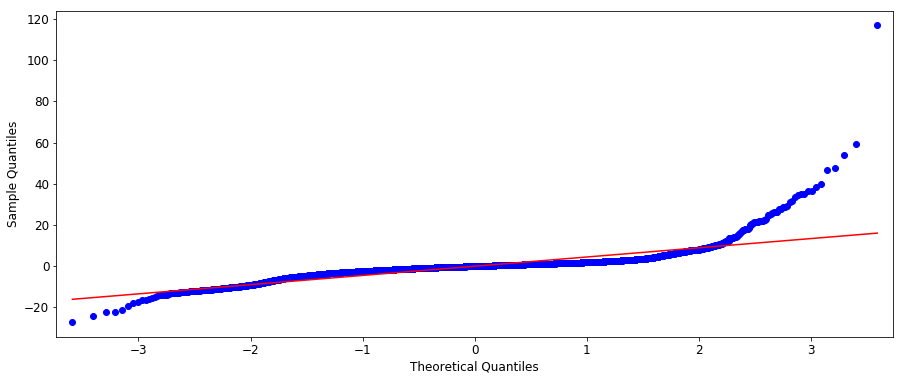

The mean of the residuals is -1.72e-13


In [477]:
import pylab

# check for the normality of the residuals
sm.qqplot(est.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(est.resid)/ len(est.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [478]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 17.2
MAE 2.35
RMSE 4.15


In [479]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.87
